How are you being treated at your company?

Business Understanding

For this project, I was interestested in using Stack Overflow data from 2020 to better understand:

How are companies treating people of different genders?

Is there any form of sexism when it comes to larger companies?

How long have people of different genders been recruited at IT companies? 

What is the kind of workload on different genders?


In [284]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

First we read the data to see how it looks

In [285]:

#Read the data and glimpse it
df = pd.read_csv('blog/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [286]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [287]:
# Data Understanding
def display_bar_chart(df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

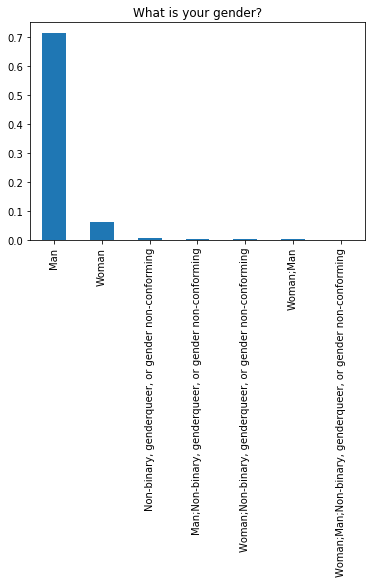

In [288]:
#Provide a pandas series of the counts for each Professional status
display_bar_chart(df, "Gender", "What is your gender?")


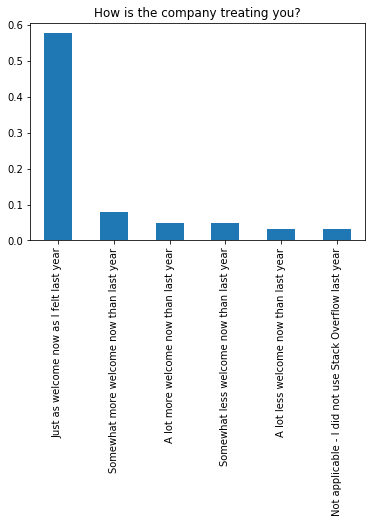

In [303]:
display_bar_chart(df, "WelcomeChange", "How is the company treating you?")


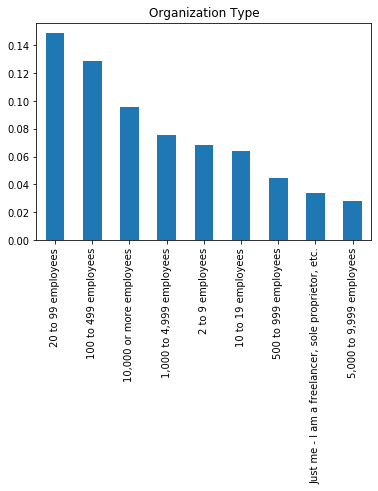

In [341]:
display_bar_chart(df, "OrgSize", "Organization Type")


In [291]:
def YearsCodePro(df):
    """
    
    Convert the YearsCodePro to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with YearsCodePro column becomes measurable
    
    """
    YearsCodePro_map = {'Less than 1 year' : 0, 
                'More than 50 years' : np.random.uniform(low=50, high=60, size=(1,))[0], 
               np.nan: np.nan
              }
    df['YearsCodePro'] = df['YearsCodePro'].apply(lambda x: int(x) if x not in ['Less than 1 year','More than 50 years',np.nan] else YearsCodePro_map[x] )
    
    return df

In [292]:
def JobSat(df):
    """
    
    Convert the JobSat to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with JobSat column becomes measurable
    
    """
    sat_map = {'Very dissatisfied' : 1, 
                'Slightly dissatisfied' : 2, 
                'Neither satisfied nor dissatisfied' : 3, 
                'Slightly satisfied' : 4,
                'Very satisfied' : 5,
               np.nan: np.nan
              }
    
    df['JobSat'] = df['JobSat'].apply(lambda x: np.nan if x == np.nan else sat_map[x] )
    return df

In [293]:

#Compare selected indicators between western and eastern
df_clean_years_coded_pro = YearsCodePro(df)
useful_df = JobSat(df_clean_years_coded_pro)
#useful_df = OrgSize(df_clean_years_coded_pro)


In [294]:
def Gender(df):
    """
    
    Convert the Gender to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with Gender column becomes measurable
    
    """
    gender_map = {'Man' : 0, 
                'Woman' :1 , 
                'Man;Non-binary, genderqueer, or gender non-conforming' : 2, 
                'Woman;Non-binary, genderqueer, or gender non-conforming' : 2,
                'Woman;Man;Non-binary, genderqueer, or gender non-conforming' : 2,
               'Woman;Man': 2,
                'Non-binary, genderqueer, or gender non-conforming':2,
               np.nan: np.nan
              }
    df['Gender'] = df['Gender'].apply(lambda x: np.nan if x == np.nan else gender_map[x] )
    
    return df

In [295]:
comparison2 = Gender(useful_df)

In [302]:
comparison2

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27.0
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4.0
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,0.0
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [296]:
comparison = comparison2.groupby(['Gender','OrgSize']).mean()
comparison

Respondent  \
Gender OrgSize                                                            
0.0    1,000 to 4,999 employees                            28062.219296   
       10 to 19 employees                                  28708.113374   
       10,000 or more employees                            28672.077977   
       100 to 499 employees                                28001.222124   
       2 to 9 employees                                    28581.968034   
       20 to 99 employees                                  28218.151910   
       5,000 to 9,999 employees                            27965.474740   
       500 to 999 employees                                28326.894397   
       Just me - I am a freelancer, sole proprietor, etc.  29001.176879   
1.0    1,000 to 4,999 employees                            32715.048485   
       10 to 19 employees                                  29864.371648   
       10,000 or more employees                            31779.982005   
       100 to 499 employees                                31667.248175   
       2 to 9 employees                                    31324.288538   
       20 to 99 employees                                  30146.786284   
       5,000 to 9,999 employees                            33252.373134   
       500 to 999 employees                                31558.497512   
       Just me - I am a freelancer, sole proprietor, etc.  32664.371134   
2.0    1,000 to 4,999 employees                            31194.360000   
       10 to 19 employees                                  29358.781818   
       10,000 or more employees                            29830.916667   
       100 to 499 employees                                30494.250000   
       2 to 9 employees                                    31146.178571   
       20 to 99 employees                                  34021.445545   
       5,000 to 9,999 employees                            34822.950000   
       500 to 999 employees                                29366.483871   
       Just me - I am a freelancer, sole proprietor, etc.  31968.538462   

                                                                 Age  \
Gender OrgSize                                                         
0.0    1,000 to 4,999 employees                            33.158058   
       10 to 19 employees                                  30.851423   
       10,000 or more employees                            32.876869   
       100 to 499 employees                                32.131361   
       2 to 9 employees                                    31.611118   
       20 to 99 employees                                  31.351388   
       5,000 to 9,999 employees                            32.901296   
       500 to 999 employees                                32.289561   
       Just me - I am a freelancer, sole proprietor, etc.  37.562874   
1.0    1,000 to 4,999 employees                            31.692833   
       10 to 19 employees                                  28.734783   
       10,000 or more employees                            31.788690   
       100 to 499 employees                                30.574447   
       2 to 9 employees                                    31.450000   
       20 to 99 employees                                  30.404181   
       5,000 to 9,999 employees                            31.000000   
       500 to 999 employees                                30.811111   
       Just me - I am a freelancer, sole proprietor, etc.  38.390805   
2.0    1,000 to 4,999 employees                            29.627907   
       10 to 19 employees                                  28.844444   
       10,000 or more employees                            30.037037   
       100 to 499 employees                                31.109375   
       2 to 9 employees                                    29.510204   
       20 to 99 employees                                  29.344086   
       5,000 

In [315]:
def OrgSize(df):
    """
    
    Convert the OrgSize to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with OrgSize column becomes measurable
    
    """
    OrgSize_map = {'2 to 9 employees' : 2, 
                '1,000 to 4,999 employees' :7 , 
                'Just me - I am a freelancer, sole proprietor, etc.' : 1, 
                '10,000 or more employees' : 9,
                '10 to 19 employees' : 3,
               '500 to 999 employees': 6,
               '20 to 99 employees': 4,
               '100 to 499 employees': 5,
               '5,000 to 9,999 employees': 8,
               np.nan: np.nan
              }
    df_graph = df.reset_index()
    df_graph['OrgSize'] = df_graph['OrgSize'].apply(lambda x: OrgSize_map[x])
    df_graph['OrgSize'] = pd.to_numeric(df_graph['OrgSize'])
    
    return df_graph

In [316]:
comparison_graph = OrgSize(comparison)
comparison_graph = comparison_graph.sort_values(by='OrgSize')

In [317]:
comparison_graph.set_index('OrgSize', inplace=True)

Text(0, 0.5, 'JobSat')

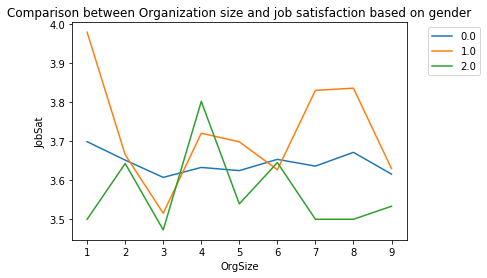

In [318]:
#comparison_graph.set_index('OrgSize', inplace=True)

#Plot the Salary Comparison between Western World and Eastern World
comparison_graph.groupby('Gender')['JobSat'].plot()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Comparison between Organization size and job satisfaction based on gender")
plt.xlabel('OrgSize')
plt.ylabel('JobSat')

0..0 - Man
1.0 - Woman
2.0 - Other
The above graph tells us that the Other category is most satisfied as freeelancers followed by larger organizations
Men on an average are moderately happy at any size organization.
Women are not happy being freelancers or being at large companies but they like it when the organization size is medium.

Text(0, 0.5, 'YearsCodePro')

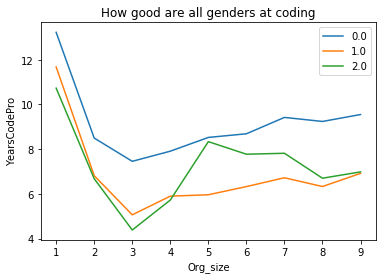

In [301]:
comparison_graph.groupby('Gender')['YearsCodePro'].plot(legend=True)
plt.title("How many years at coding");
plt.xlabel('Org_size')
plt.ylabel('YearsCodePro')

You can see that freelancers are mostly coers who have coded professionaly for more than 10 years.
As the company size increases, men are fairly more experienced whereas the other genders are less experienced.

Text(0, 0.5, 'WorkWeekHrs')

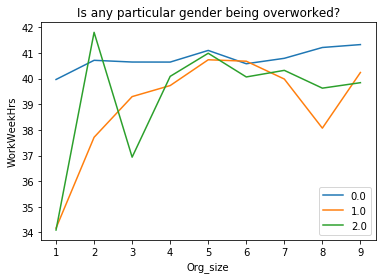

In [343]:
comparison_graph.groupby('Gender')['WorkWeekHrs'].plot(legend=True)
plt.title("Is any particular gender being overworked?");
plt.xlabel('Org_size')
plt.ylabel('WorkWeekHrs')

In [ ]:
Men are overworking on a constant basis. Woman on the other hand work for less than 40 hrs per week in any organization.

In [304]:
comparison3 = comparison2.groupby(['Gender','WelcomeChange']).mean()


In [305]:
comparison3

Respondent  \
Gender WelcomeChange                                                      
0.0    A lot less welcome now than last year               25327.673299   
       A lot more welcome now than last year               28638.947180   
       Just as welcome now as I felt last year             29124.974998   
       Not applicable - I did not use Stack Overflow l...  32538.762290   
       Somewhat less welcome now than last year            26106.739633   
       Somewhat more welcome now than last year            28586.024793   
1.0    A lot less welcome now than last year               27368.075000   
       A lot more welcome now than last year               29393.234973   
       Just as welcome now as I felt last year             32061.657497   
       Not applicable - I did not use Stack Overflow l...  35753.521531   
       Somewhat less welcome now than last year            28191.271084   
       Somewhat more welcome now than last year            33018.904348   
2.0    A lot less welcome now than last year               23259.325000   
       A lot more welcome now than last year               36064.560000   
       Just as welcome now as I felt last year             32320.272953   
       Not applicable - I did not use Stack Overflow l...  33545.714286   
       Somewhat less welcome now than last year            31074.013514   
       Somewhat more welcome now than last year            30048.357143   

                                                                 Age  \
Gender WelcomeChange                                                   
0.0    A lot less welcome now than last year               30.760787   
       A lot more welcome now than last year               27.392390   
       Just as welcome now as I felt last year             31.669489   
       Not applicable - I did not use Stack Overflow l...  27.347289   
       Somewhat less welcome now than last year            31.593952   
       Somewhat more welcome now than last year            28.478795   
1.0    A lot less welcome now than last year               32.340659   
       A lot more welcome now than last year               26.390411   
       Just as welcome now as I felt last year             30.795701   
       Not applicable - I did not use Stack Overflow l...  28.371429   
       Somewhat less welcome now than last year            29.395683   
       Somewhat more welcome now than last year            28.381579   
2.0    A lot less welcome now than last year               26.107143   
       A lot more welcome now than last year               30.785714   
       Just as welcome now as I felt last year             28.473046   
       Not applicable - I did not use Stack Overflow l...  25.400000   
       Somewhat less welcome now than last year            31.500000   
       Somewhat more welcome now than last year            28.022222   

                                                              CompTotal  \
Gender WelcomeChange                                                      
0.0    A lot less welcome now than last year               1.175984e+07   
       A lot more welcome now than last year               1.218334e+07   
       Just as welcome now as I felt last year             4.654640e+08   
       Not applicable - I did not use Stack Overflow l...  1.305730e+06   
       Somewhat less welcome now than last year            2.450310e+06   
       Somewhat more welcome now than last year            3.800027e+06   
1.0    A lot less welcome now than last year               1.272433e+05   
       A lot more welcome now than last year               5.235030e+06   
       Just as welcome now as I felt last year             4.411853e+05   
       Not applicable - I did not use Stack Overflow l...  6.223525e+05   
       Somewhat less welcome now than last year            3.780338e+05   
       Somewhat more welcome now than last year            2.891625e+05   
2.0    A lot less welcome now than last year               1.069258e+

In [309]:
def WelcomeChange(df):
    """
    
    Convert the OrgSize to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with OrgSize column becomes measurable
    
    """
    OrgSize_map = {'A lot less welcome now than last year' : 1, 
                'A lot more welcome now than last year' :2, 
                'Just as welcome now as I felt last year' : 3, 
                'Not applicable - I did not use Stack Overflow last year' : 4,
                'Somewhat less welcome now than last year' : 5,
               'Somewhat more welcome now than last year': 6,
               np.nan: np.nan
              }
    df_graph = df.reset_index()
    df_graph['WelcomeChange'] = df_graph['WelcomeChange'].apply(lambda x: OrgSize_map[x])
    df_graph['WelcomeChange'] = pd.to_numeric(df_graph['WelcomeChange'])
    
    return df_graph

In [310]:
comparison_graph = WelcomeChange(comparison3)
comparison_graph = comparison_graph.sort_values(by='WelcomeChange')
comparison_graph.set_index('WelcomeChange', inplace=True)

In [311]:
comparison_graph

,Gender,Respondent,Age,CompTotal,ConvertedComp,JobSat,WorkWeekHrs,YearsCodePro
WelcomeChange,,,,,,,,
1,0.0,25327.673299,30.760787,1.175984e+07,103395.848677,3.582792,40.222271,8.966244
1,2.0,23259.325000,26.107143,1.069258e+05,155494.631579,3.333333,34.565217,6.357143
1,1.0,27368.075000,32.340659,1.272433e+05,108050.393939,3.583333,39.005747,8.028846
2,0.0,28638.947180,27.392390,1.218334e+07,51231.153597,3.562327,41.123051,5.691115
2,2.0,36064.560000,30.785714,3.000192e+05,41150.416667,3.882353,43.750000,4.941176
2,1.0,29393.234973,26.390411,5.235030e+06,87131.569444,3.540323,40.090909,4.276923
3,2.0,32320.272953,28.473046,1.273562e+06,100326.169173,3.686869,39.550877,6.816054
3,1.0,32061.657497,30.795701,4.411853e+05,100113.116224,3.757198,39.434600,6.722338
3,0.0,29124.974998,31.669489,4.654640e+08,109628.536669,3.661179,40.846215,9.352398


Text(0, 0.5, 'JobSat')

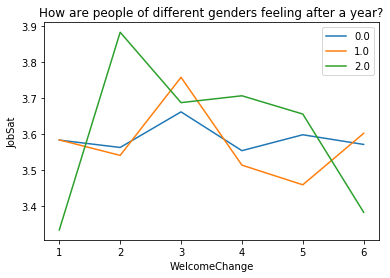

In [313]:
comparison_graph.groupby('Gender')['JobSat'].plot(legend=True)
plt.title("How are people of different genders feeling after a year?");
plt.xlabel('WelcomeChange')
plt.ylabel('JobSat')

In [314]:
df['Gender'].value_counts()

0.0    46013
1.0     3844
2.0      700
Name: Gender, dtype: int64

In [325]:
comparison_graph

,Gender,Respondent,Age,CompTotal,ConvertedComp,JobSat,WorkWeekHrs,YearsCodePro
OrgSize,,,,,,,,
1,2.0,31968.538462,36.000000,2.971750e+05,56156.937500,3.500000,34.095238,10.730769
1,1.0,32664.371134,38.390805,4.963158e+04,60592.750000,3.979167,34.170732,11.677083
1,0.0,29001.176879,37.562874,9.202052e+09,81794.470315,3.698781,39.970125,13.228986
2,2.0,31146.178571,29.510204,2.344053e+06,90113.688889,3.642857,41.810000,6.678571
2,1.0,31324.288538,31.450000,3.821652e+05,71187.977528,3.665339,37.713974,6.813205
2,0.0,28581.968034,31.611118,2.315684e+06,69139.551457,3.651558,40.718579,8.496434
3,0.0,28708.113374,30.851423,2.121626e+06,72589.567841,3.607306,40.651107,7.456578
3,1.0,29864.371648,28.734783,9.530222e+05,62212.322917,3.515385,39.301702,5.062016
3,2.0,29358.781818,28.844444,2.174050e+09,66690.260870,3.472727,36.938776,4.381818


In [330]:
df.groupby('OrgSize')['Gender'].value_counts()

OrgSize                                             Gender
1,000 to 4,999 employees                            0.0       3949
                                                    1.0        330
                                                    2.0         50
10 to 19 employees                                  0.0       3290
                                                    1.0        261
                                                    2.0         55
10,000 or more employees                            0.0       4963
                                                    1.0        389
                                                    2.0         60
100 to 499 employees                                0.0       6762
                                                    1.0        548
                                                    2.0         76
2 to 9 employees                                    0.0       3535
                                                    1.0        253
   

In [ ]:
Many companies have not updated their OrgSize status. 